In [8]:
import scvi
import scanpy as sc
from sklearn.preprocessing import MinMaxScaler

# Test scVI implementation of gaushVI 

## Decoder: Normal distribution

In [9]:
source7 = sc.read_h5ad("/vol/data/ouologuems/data/preprocessed/source7.h5ad")
source7

AnnData object with n_obs × n_vars = 2674 × 601
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'SMILES_original', 'SMILES_standardized', 'InChI_standardized', 'InChIKey_standardized', 'broad_sample', 'InChIKey', 'pert_iname', 'pubchem_cid', 'target', 'pert_type', 'control_type', 'moa', 'well_id'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [10]:
scaler = MinMaxScaler()
source7.X = scaler.fit_transform(source7.X)

In [11]:
scvi.model.SCVI.setup_anndata(source7, batch_key="Metadata_Plate")

/vol/data/ouologuems/scvi-tools/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [12]:
model = scvi.model.SCVI(source7, gene_likelihood="normal")

In [13]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/vol/data/ouologuems/miniconda3/envs/gaushvi/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

Epoch 400/400: 100%|██████████| 400/400 [01:26<00:00,  4.68it/s, v_num=1, train_loss_step=-1.11e+3, train_loss_epoch=-1.15e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:26<00:00,  4.62it/s, v_num=1, train_loss_step=-1.11e+3, train_loss_epoch=-1.15e+3]


In [14]:
SCVI_LATENT_KEY = "X_scVI"
source7.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [15]:
sc.pp.neighbors(source7, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(source7)

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


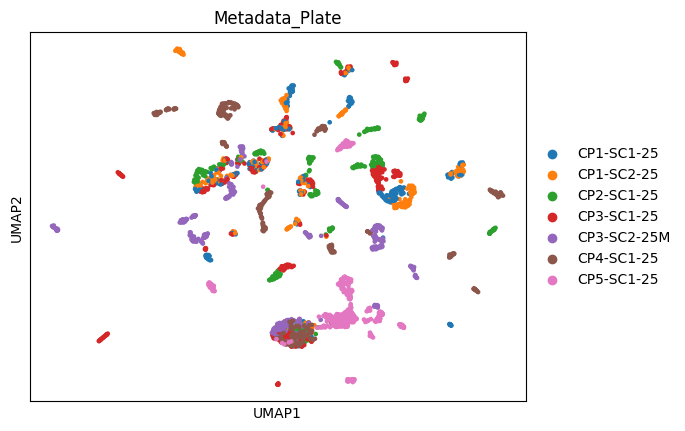

In [16]:
sc.pl.umap(source7, color="Metadata_Plate")

## Decoder: ZINB distribution

In [17]:
source7 = sc.read_h5ad("/vol/data/ouologuems/data/preprocessed/source7.h5ad")
scaler = MinMaxScaler()
source7.X = scaler.fit_transform(source7.X)
scvi.model.SCVI.setup_anndata(source7, batch_key="Metadata_Plate")
model = scvi.model.SCVI(source7, gene_likelihood="zinb")
model.train()

/vol/data/ouologuems/scvi-tools/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/vol/data/ouologuems/miniconda3/envs/gaushvi/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/vol/data/ouologuems/scvi-tools/scvi/module/_vae.py:481: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/vol/data/ouologuems/scvi-tools/scvi/module/_vae.py:481: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/400:   0%|          | 1/400 [00:00<02:02,  3.26it/s, v_num=1, train_loss_step=816, train_loss_epoch=922]

/vol/data/ouologuems/scvi-tools/scvi/module/_vae.py:481: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|██████████| 400/400 [01:52<00:00,  3.69it/s, v_num=1, train_loss_step=421, train_loss_epoch=420]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:52<00:00,  3.55it/s, v_num=1, train_loss_step=421, train_loss_epoch=420]


/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


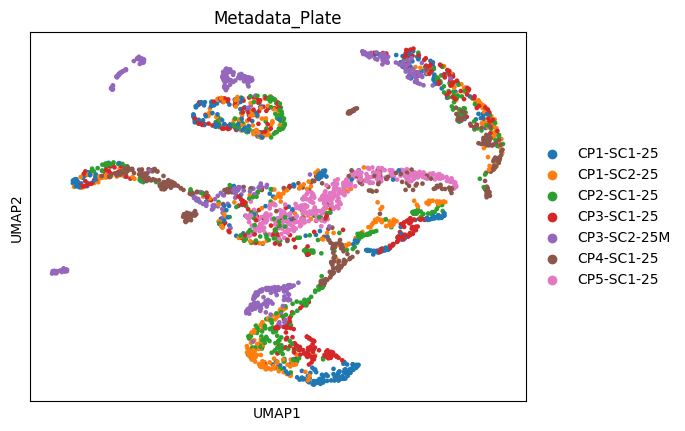

In [18]:
SCVI_LATENT_KEY = "X_scVI"
source7.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()
sc.pp.neighbors(source7, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(source7)
sc.tl.umap(source7)
sc.pl.umap(source7, color="Metadata_Plate")